In [2]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [3]:
import pandas as pd
df = pd.read_csv("Datasets/spam.csv")

In [4]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [6]:
df['spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [7]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [8]:
df.spam.value_counts()

spam
0    4825
1     747
Name: count, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size = 0.2, random_state = 42 )

In [10]:
x_train.shape

(4457,)

In [11]:
x_test.shape

(1115,)

In [12]:
x_train[:4]

1978    Reply to win £100 weekly! Where will the 2006 ...
3989    Hello. Sort of out in town already. That . So ...
3935     How come guoyang go n tell her? Then u told her?
4078    Hey sathya till now we dint meet not even a si...
Name: Message, dtype: object

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

x_train_cv = v.fit_transform(x_train.values)
x_train_cv

<4457x7701 sparse matrix of type '<class 'numpy.int64'>'
	with 59275 stored elements in Compressed Sparse Row format>

In [14]:
x_train_cv.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
x_train_cv.shape

(4457, 7701)

In [16]:
v.vocabulary_

{'reply': 5687,
 'to': 6888,
 'win': 7474,
 '100': 258,
 'weekly': 7396,
 'where': 7437,
 'will': 7471,
 'the': 6773,
 '2006': 354,
 'fifa': 2805,
 'world': 7555,
 'cup': 2106,
 'be': 1271,
 'held': 3364,
 'send': 5980,
 'stop': 6460,
 '87239': 694,
 'end': 2568,
 'service': 5999,
 'hello': 3369,
 'sort': 6304,
 'of': 4854,
 'out': 4976,
 'in': 3603,
 'town': 6959,
 'already': 924,
 'that': 6770,
 'so': 6252,
 'dont': 2395,
 'rush': 5825,
 'home': 3441,
 'am': 934,
 'eating': 2504,
 'nachos': 4650,
 'let': 4057,
 'you': 7662,
 'know': 3926,
 'eta': 2627,
 'how': 3487,
 'come': 1902,
 'guoyang': 3258,
 'go': 3140,
 'tell': 6711,
 'her': 3384,
 'then': 6784,
 'told': 6904,
 'hey': 3392,
 'sathya': 5881,
 'till': 6856,
 'now': 4808,
 'we': 7372,
 'dint': 2323,
 'meet': 4392,
 'not': 4797,
 'even': 2638,
 'single': 6147,
 'time': 6857,
 'can': 1629,
 'saw': 5894,
 'situation': 6164,
 'orange': 4945,
 'brings': 1509,
 'ringtones': 5763,
 'from': 2993,
 'all': 911,
 'chart': 1733,
 'heroes':

In [17]:
x_train_np = x_train_cv.toarray()
x_train_np[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train_cv, y_train)

MultinomialNB()

In [19]:
x_test_cv = v.transform(x_test)

In [20]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test_cv)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9919282511210762

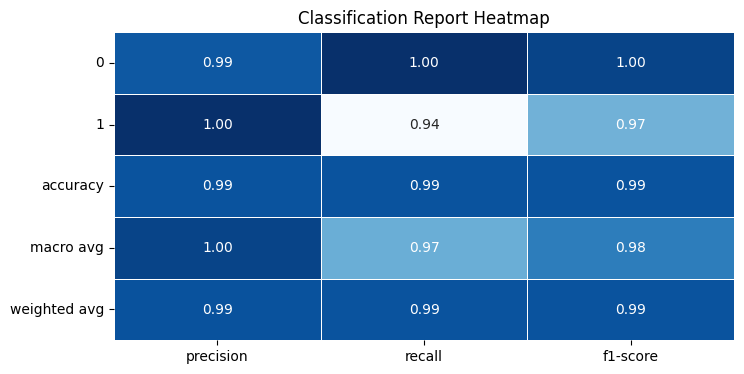

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame for visualization
df = pd.DataFrame(report_dict).T

# Drop support column (optional)
df = df.drop(columns=['support'])

# Plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5, cbar=False)
plt.title("Classification Report Heatmap")
plt.show()

In [23]:
email = [
    "Congratulations! 🎉 You’ve won a free iPhone! Click here to claim your prize now: http://scam-link.com",
    "Hey John, are we still on for the meeting tomorrow at 10 AM?"
]

email_count = v.transform(email)

print(model.predict(email_count))

[1 0]
